## Analysis: what are consistent predictors of "success"?

### The goal of this notebook is to explore election data, only in 2014 and 2019 to assess factors that determine success in candidates. Based on the previously done analysis, I've identified some key factors that.

In [191]:
import warnings
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [192]:
data_path = "../data/elections_data_all.csv"
df = pd.read_csv(data_path)
df.reset_index(inplace=True)

In [170]:
for c in df.columns:
    print(c)

index
State_Name
Assembly_No
Constituency_No
Year
month
Poll_No
DelimID
Position
Candidate
Sex
Party
Votes
Candidate_Type
Valid_Votes
Electors
Constituency_Name
Constituency_Type
Sub_Region
N_Cand
Turnout_Percentage
Vote_Share_Percentage
Deposit_Lost
Margin
Margin_Percentage
ENOP
pid
Party_Type_TCPD
Party_ID
last_poll
Contested
Last_Party
Last_Party_ID
Last_Constituency_Name
Same_Constituency
Same_Party
No_Terms
Turncoat
Incumbent
Recontest
MyNeta_education
TCPD_Prof_Main
TCPD_Prof_Main_Desc
TCPD_Prof_Second
TCPD_Prof_Second_Desc
Election_Type


In [171]:
for c in df.columns:
    print(c, end=" | ")

index | State_Name | Assembly_No | Constituency_No | Year | month | Poll_No | DelimID | Position | Candidate | Sex | Party | Votes | Candidate_Type | Valid_Votes | Electors | Constituency_Name | Constituency_Type | Sub_Region | N_Cand | Turnout_Percentage | Vote_Share_Percentage | Deposit_Lost | Margin | Margin_Percentage | ENOP | pid | Party_Type_TCPD | Party_ID | last_poll | Contested | Last_Party | Last_Party_ID | Last_Constituency_Name | Same_Constituency | Same_Party | No_Terms | Turncoat | Incumbent | Recontest | MyNeta_education | TCPD_Prof_Main | TCPD_Prof_Main_Desc | TCPD_Prof_Second | TCPD_Prof_Second_Desc | Election_Type | 

In [172]:
# Data Cleaning DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')[source]


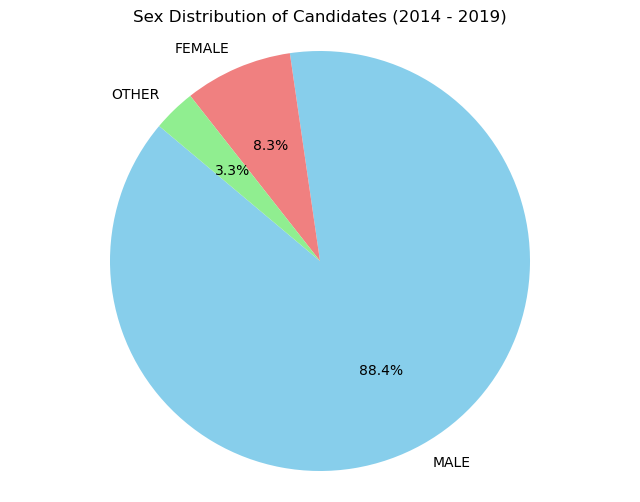

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a Pandas DataFrame called 'df'

# Filter the data for candidates in 2014 and 2019
filtered_df = df[(df['Year'] == 2014) | (df['Year'] == 2019)]

# Data Cleaning: Standardize the 'Sex' column values to 'MALE', 'FEMALE', or 'OTHER'
sex_mapping = {
    'M': 'MALE',
    'm': 'MALE',
    'Male': 'MALE',
    'F': 'FEMALE',
    'f': 'FEMALE',
    'Female': 'FEMALE',
    'O': 'OTHER',  # Assuming 'O' represents 'OTHER'
    'Nota': 'OTHER',  # Assuming 'Nota' represents 'OTHER'
    'NOTA': 'OTHER'  # Assuming 'NOTA' represents 'OTHER'
}

filtered_df['Sex'] = filtered_df['Sex'].replace(sex_mapping)

# Get the sex distribution
sex_distribution = filtered_df['Sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])

# Add a title
plt.title('Sex Distribution of Candidates (2014 - 2019)')

# Show the pie chart
plt.axis('equal')
plt.show()


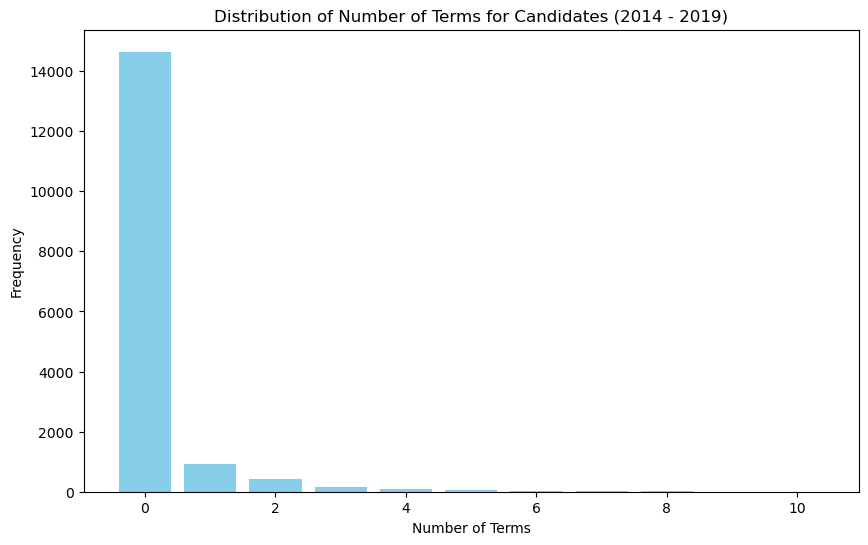

In [174]:
# Filter the data for candidates in 2014 and 2019
filtered_df = df[(df['Year'] == 2014) | (df['Year'] == 2019)]

# Data Cleaning: Assuming 'N_Terms' is the column for Number of Terms served by candidates
# You may need to adjust the column name based on your dataset
# For this example, let's assume the number of terms is an integer value
# If the column contains non-integer values or missing data, you may need further data cleaning or preprocessing

# Get the distribution of number of terms
terms_distribution = filtered_df['No_Terms'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
plt.bar(terms_distribution.index, terms_distribution.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Terms')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Terms for Candidates (2014 - 2019)')

# Show the plot
plt.show()


ValueError: Could not interpret input 'Gender'

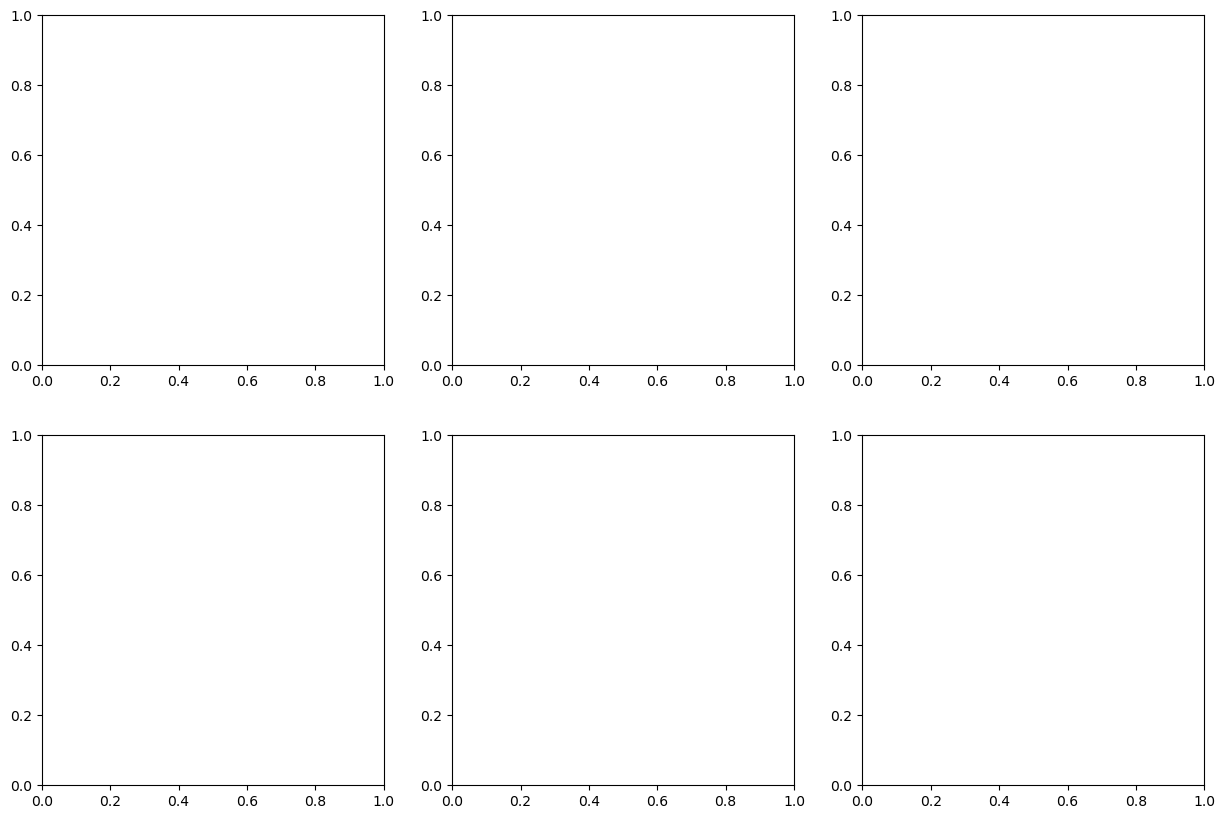

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the entire electoral data is in df, and columns 'Gender', 'Caste', and 'Education Level' exist in the dataframe

# Set the number of rows and columns for the subplot grid
num_rows = 2  # Number of rows in the grid
num_cols = 3  # Number of columns in the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Bar Plot: Gender Distribution
sns.countplot(data=df, x='Gender', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Bar Plot: Caste Distribution
sns.countplot(data=df, x='Caste', ax=axes[0, 1])
axes[0, 1].set_title('Caste Distribution')

# Bar Plot: Education Level Distribution
sns.countplot(data=df, x='Education Level', ax=axes[0, 2])
axes[0, 2].set_title('Education Level Distribution')

# Stacked Bar Plot: Gender and Caste Distribution
sns.countplot(data=df, x='Caste', hue='Gender', ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution within each Caste')

# Stacked Bar Plot: Gender and Education Level Distribution
sns.countplot(data=df, x='Education Level', hue='Gender', ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution within each Education Level')

# Grouped Bar Plot: Gender and Success Measures (Average Vote Share Percentage)
sns.barplot(data=df, x='Gender', y='Vote_Share_Percentage', ci=None, ax=axes[1, 2])
axes[1, 2].set_title('Average Vote Share Percentage by Gender')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


/var/folders/n0/ghrwq2494rq706swf_jqkwd80000gn/T/ipykernel_55201/1272133068.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sex'] = filtered_df['Sex'].replace(sex_mapping)


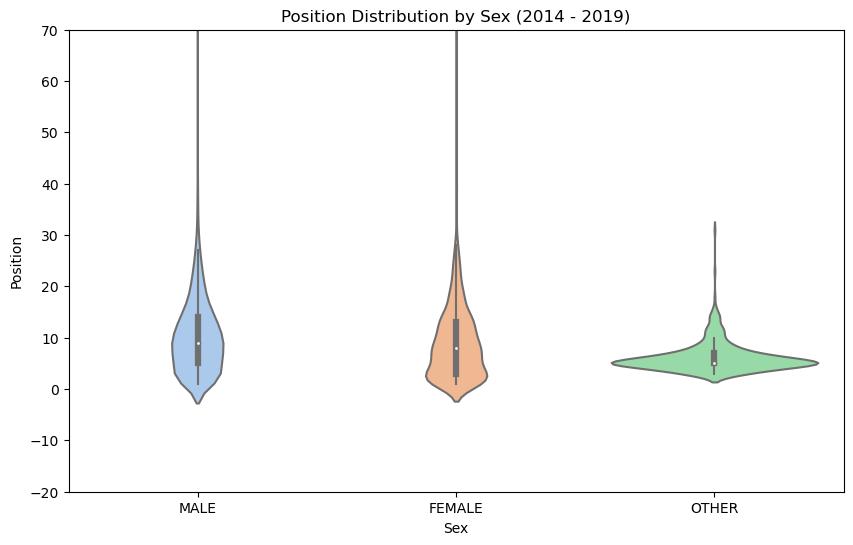

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a Pandas DataFrame called 'df'

# Filter the data for candidates in 2014 and 2019
filtered_df = df[(df['Year'] == 2014) | (df['Year'] == 2019)]

# Data Cleaning: Standardize the 'Sex' column values to 'MALE', 'FEMALE', or 'OTHER'
sex_mapping = {
    'M': 'MALE',
    'm': 'MALE',
    'Male': 'MALE',
    'F': 'FEMALE',
    'f': 'FEMALE',
    'Female': 'FEMALE',
    'O': 'OTHER',  # Assuming 'O' represents 'OTHER'
    'Nota': 'OTHER',  # Assuming 'Nota' represents 'OTHER'
    'NOTA': 'OTHER'  # Assuming 'NOTA' represents 'OTHER'
}

filtered_df['Sex'] = filtered_df['Sex'].replace(sex_mapping)

# Using 'Position' as the factor to plot against 'Sex', you can replace it with any other column as needed
factor_to_plot = 'Position'

# Create a violin plot to visualize the distribution of positions with regard to sex
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_df, x='Sex', y=factor_to_plot, palette='pastel')
plt.xlabel('Sex')

plt.ylabel(factor_to_plot)
plt.ylim(-20, 70)  # Set the y-axis limit to 0 and 30
plt.title(f'Position Distribution by Sex (2014 - 2019)')
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'invert_yaxis'

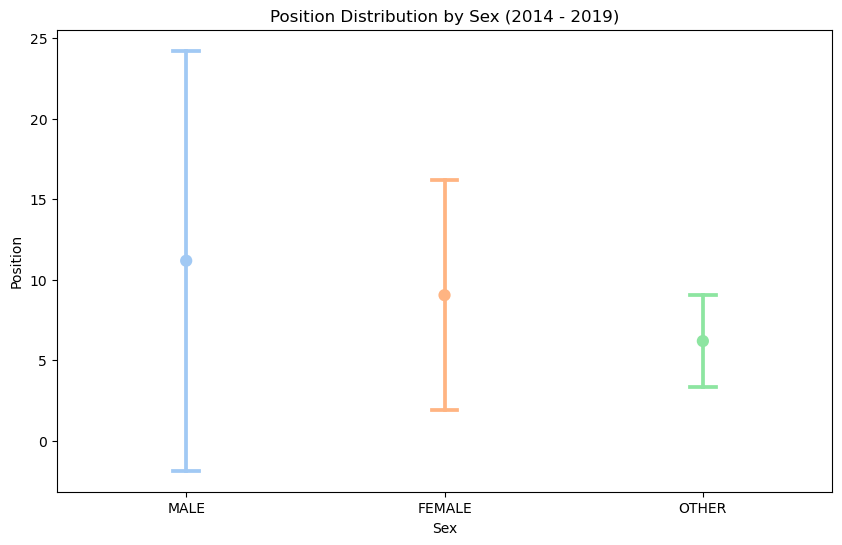

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a Pandas DataFrame called 'df'

# Filter the data for candidates in 2014 and 2019
filtered_df = df[(df['Year'] == 2014) | (df['Year'] == 2019)]

# Data Cleaning: Standardize the 'Sex' column values to 'MALE', 'FEMALE', or 'OTHER'
sex_mapping = {
    'M': 'MALE',
    'm': 'MALE',
    'Male': 'MALE',
    'F': 'FEMALE',
    'f': 'FEMALE',
    'Female': 'FEMALE',
    'O': 'OTHER',  # Assuming 'O' represents 'OTHER'
    'Nota': 'OTHER',  # Assuming 'Nota' represents 'OTHER'
    'NOTA': 'OTHER'  # Assuming 'NOTA' represents 'OTHER'
}

filtered_df['Sex'] = filtered_df['Sex'].replace(sex_mapping)

# Using 'Position' as the measure of success, you can replace it with any other column as needed
success_measure = 'Position'

# Create a point plot to visualize the distribution of positions with regard to sex
plt.figure(figsize=(10, 6))
sns.pointplot(data=filtered_df, x='Sex', y=success_measure, ci='sd', palette='pastel', capsize=0.1)
plt.xlabel('Sex')
plt.ylabel(success_measure)
plt.title(f'Position Distribution by Sex (2014 - 2019)')
plt.invert_yaxis()
plt.show()


In [176]:
import pandas as pd

# Assuming your dataset is loaded into a Pandas DataFrame called 'df'

# Get the number of unique values in the 'Party' column
num_unique_parties = df['Party'].nunique()

print(f"Number of unique values in the 'Party' column: {num_unique_parties}")


Number of unique values in the 'Party' column: 1614


In [177]:
import pandas as pd

# Assuming your dataset is loaded into a Pandas DataFrame called 'df'

# Calculate the correlation between 'Contested' and 'Vote_Share_Percentage'
correlation = df['Contested'].corr(df['Vote_Share_Percentage'])

print(f"Correlation between 'Contested' and 'Vote_Share_Percentage': {correlation:.2f}")


Correlation between 'Contested' and 'Vote_Share_Percentage': 0.35


MALE      14913
FEMALE     1401
OTHER       555
Name: Sex, dtype: int64


<Figure size 1000x600 with 0 Axes>

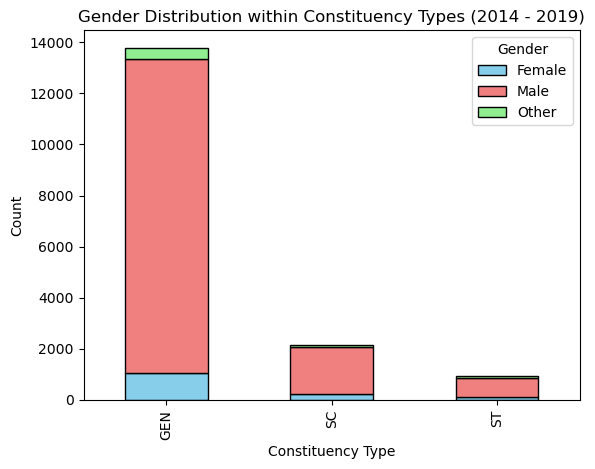

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a Pandas DataFrame called 'df'

# Data Cleaning: Standardize the 'Sex' column values to 'MALE', 'FEMALE', or 'OTHER'
sex_mapping = {
    'M': 'MALE',
    'm': 'MALE',
    'Male': 'MALE',
    'F': 'FEMALE',
    'f': 'FEMALE',
    'Female': 'FEMALE',
    'O': 'OTHER',  # Assuming 'O' represents 'OTHER'
    'Nota': 'OTHER',  # Assuming 'Nota' represents 'OTHER'
    'NOTA': 'OTHER'  # Assuming 'NOTA' represents 'OTHER'
}

df['Sex'] = df['Sex'].replace(sex_mapping)

# Filter the data for candidates in 2014 and 2019
filtered_df = df[(df['Year'] == 2014) | (df['Year'] == 2019)]

# Perform sanity check on gender distribution
gender_counts = filtered_df['Sex'].value_counts()
print(gender_counts)

# Create a cross-tabulation between 'Constituency_Type' and 'Sex'
cross_tab = pd.crosstab(filtered_df['Constituency_Type'], filtered_df['Sex'])

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black')

# Add labels and title
plt.xlabel('Constituency Type')
plt.ylabel('Count')
plt.title('Gender Distribution within Constituency Types (2014 - 2019)')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male', 'Other'])

# Show the plot
plt.show()


MALE      14913
FEMALE     1401
OTHER       555
Name: Sex, dtype: int64


<Figure size 1000x600 with 0 Axes>

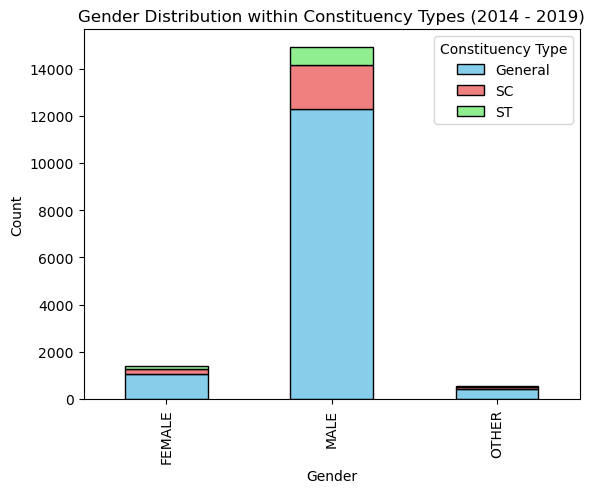

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a Pandas DataFrame called 'df'

# Data Cleaning: Standardize the 'Sex' column values to 'MALE', 'FEMALE', or 'OTHER'
sex_mapping = {
    'M': 'MALE',
    'm': 'MALE',
    'Male': 'MALE',
    'F': 'FEMALE',
    'f': 'FEMALE',
    'Female': 'FEMALE',
    'O': 'OTHER',  # Assuming 'O' represents 'OTHER'
    'Nota': 'OTHER',  # Assuming 'Nota' represents 'OTHER'
    'NOTA': 'OTHER'  # Assuming 'NOTA' represents 'OTHER'
}

df['Sex'] = df['Sex'].replace(sex_mapping)

# Filter the data for candidates in 2014 and 2019
filtered_df = df[(df['Year'] == 2014) | (df['Year'] == 2019)]

# Perform sanity check on gender distribution
gender_counts = filtered_df['Sex'].value_counts()
print(gender_counts)

# Create a cross-tabulation between 'Sex' and 'Constituency_Type'
cross_tab = pd.crosstab(filtered_df['Sex'], filtered_df['Constituency_Type'])

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution within Constituency Types (2014 - 2019)')
plt.legend(title='Constituency Type', loc='upper right', labels=['General', 'SC', 'ST'])

# Show the plot
plt.show()


# Analysis: 

## What

# Judiciary System Analysis

## About:

* This is a data science project that explores ~80 million Indian district court data across states from the Development Data Lab.
* This this project also uses scikit-learn to build a RandomForest classifier to predict wether a judge is likely to award acquisition or conviction

## Approach taken:
* The given information was visualized (see figure below):
* Samples were merged using pandas from each table, and initial data exploration was done to understand correlation between given data.
* From above data exploration, this project looks into 3 major questions:

```
1. The effect of the experience of a judge in awarding dispositions

2. If the gender of the defendant's advocate had any bearing on the outcome (hint: it did)

3. To track the speed of decisions taken by judges vis a vis the number of unfinished cases
```
## Handling Large Data:
* Most of the pandas functions used were used as chunks, which breaks the large files into smaller sections which is much more memory efficient
* Unnecessary columns were dropped to significantly save RAM resources

## Running:

* The code is shared as a .ipynb notebook which can be batch run. The dataset is uploaded as a zip so it needs to be decompressed first, and the decompresed folder should be added to the same directory as the zipped folder

* The 3 analysis points, the classifier, and the data cleaning processes to get clean data fro the classifier are displayed as notebooks, along with the rest of the directory that stores the data, along with a binary of the trained classifier/

## Dependencies:
```
pandas
numpy
matplotlib
scikit-learn
pickle
copy
datetime

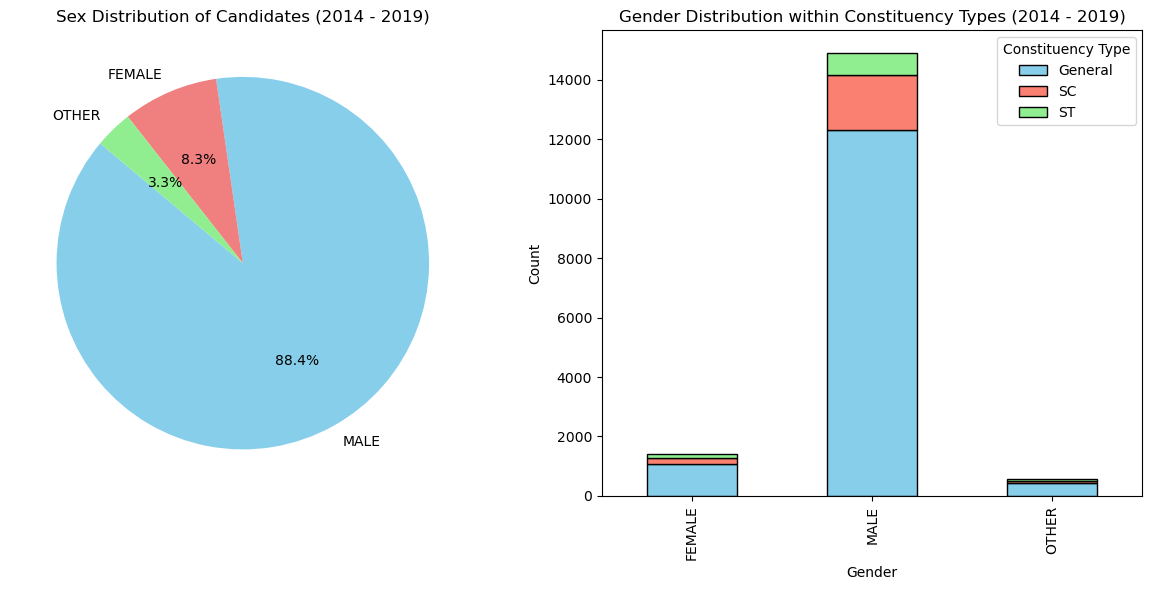

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Filter data for years 2014 and 2019
filtered_df = df[df['Year'].isin([2014, 2019])]

# Data cleaning and mapping
sex_mapping = {
    'M': 'MALE',
    'm': 'MALE',
    'Male': 'MALE',
    'F': 'FEMALE',
    'f': 'FEMALE',
    'Female': 'FEMALE',
    'O': 'OTHER',
    'Nota': 'OTHER',
    'NOTA': 'OTHER'
}
filtered_df['Sex'] = filtered_df['Sex'].replace(sex_mapping)

# Get the sex distribution
sex_distribution = filtered_df['Sex'].value_counts()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart on the left with a box
colors_pie = ['skyblue', 'lightcoral', 'lightgreen']
wedges, texts, autotexts = ax1.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140, colors=colors_pie)
ax1.set_title('Sex Distribution of Candidates (2014 - 2019)')

# Create a stacked bar chart on the right
colors_bar = ['skyblue', 'salmon', 'lightgreen']
cross_tab = pd.crosstab(filtered_df['Sex'], filtered_df['Constituency_Type'])
cross_tab.plot(kind='bar', stacked=True, color=colors_bar, edgecolor='black', ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')
ax2.set_title('Gender Distribution within Constituency Types (2014 - 2019)')
ax2.legend(title='Constituency Type', loc='upper right', labels=['General', 'SC', 'ST'])

plt.tight_layout()
plt.show()
